# Logistic Regression Implementation

Complete implementation guide covering:
- Binary & Multi-class Classification
- Hyperparameter Tuning (GridSearchCV & RandomizedSearchCV)
- Imbalanced Dataset Handling
- ROC Curve & Threshold Selection

## Dataset Creation with sklearn

### Using `make_classification`

> **Important:** `make_classification` creates pre-standardized data, skipping preprocessing steps.

**Key Parameters:**
- `n_samples`: Number of data points
- `n_features`: Number of independent features
- `n_classes`: Number of output categories (2 for binary)
- `n_informative`: Number of informative features
- `n_redundant`: Number of redundant features
- `random_state`: For reproducibility

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import dataset creation tool
from sklearn.datasets import make_classification

# Create synthetic dataset
X, y = make_classification(
    n_samples=1000,        # number of data points
    n_features=10,         # number of independent features
    n_classes=2,           # binary classification
    random_state=42
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Unique classes: {np.unique(y)}")

X shape: (1000, 10)
y shape: (1000,)
Unique classes: [0 1]


In [3]:
# View data as DataFrame
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224


In [4]:
# Check target distribution
print("Class distribution:")
print(pd.Series(y).value_counts())

Class distribution:
0    501
1    499
Name: count, dtype: int64


## Binary Classification

### Train-Test Split

> **Note:** `random_state` ensures same split every time for reproducibility.

In [5]:
from sklearn.model_selection import train_test_split

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 700
Testing samples: 300


### Basic Logistic Regression Implementation

**Key Parameters in LogisticRegression:**
- `penalty`: L1, L2, elasticnet, none (regularization type)
- `C`: Inverse of regularization strength (higher C = less regularization)
- `solver`: Algorithm to use (newton-cg, lbfgs, liblinear, sag, saga)
- `class_weight`: For handling imbalanced datasets
- `max_iter`: Maximum iterations for convergence

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


### Making Predictions

> **Remember:** `predict()` gives class labels (0 or 1), while `predict_proba()` gives probabilities for each class.

In [7]:
# Predict class labels
y_pred = logistic.predict(X_test)
print("Predictions (first 10):")
print(y_pred[:10])

Predictions (first 10):
[0 1 0 1 0 1 0 0 0 0]


In [8]:
# Predict probabilities
y_pred_proba = logistic.predict_proba(X_test)
print("Probabilities (first 5):")
print(y_pred_proba[:5])
print("\nColumns: [P(class=0), P(class=1)]")

Probabilities (first 5):
[[0.77447791 0.22552209]
 [0.0336685  0.9663315 ]
 [0.67068215 0.32931785]
 [0.0798668  0.9201332 ]
 [0.97661665 0.02338335]]

Columns: [P(class=0), P(class=1)]


### Performance Metrics

**Key Metrics:**

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Samples}}$$

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

Accuracy: 0.8467
Accuracy Percentage: 84.67%


In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n[[TN, FP]")
print(" [FN, TP]]")

Confusion Matrix:
[[118  17]
 [ 29 136]]

[[TN, FP]
 [FN, TP]]


In [11]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



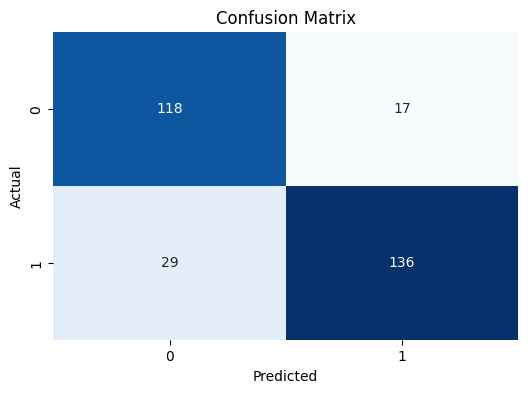

In [12]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
## Hyperparameter Tuning

### Method 1: GridSearchCV

> **Definition:** GridSearchCV tests ALL combinations of parameters to find the best one.

> **Warning:** Can be time-consuming with large parameter grids.

**Strategy:**
1. Define parameter grid
2. Use cross-validation (StratifiedKFold)
3. Find best combination based on scoring metric

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

print("Parameter Grid:")
for key, values in params.items():
    print(f"{key}: {values}")

Parameter Grid:
penalty: ['l1', 'l2', 'elasticnet', 'none']
C: [100, 10, 1.0, 0.1, 0.01]
solver: ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


In [14]:
# Initialize model
model = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=False),
    n_jobs=-1,  # use all processors
    verbose=1
)

print("GridSearchCV initialized!")

GridSearchCV initialized!


In [15]:
# Fit GridSearchCV (this will take time)
print("Starting GridSearchCV...")
grid.fit(X_train, y_train)
print("Training completed!")

Starting GridSearchCV...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training completed!


c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
300 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\Desktop\Da

In [16]:
# Best parameters and score
print("Best Parameters:")
print(grid.best_params_)
print(f"\nBest Cross-Validation Score: {grid.best_score_:.4f}")

Best Parameters:
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

Best Cross-Validation Score: 0.8786


In [17]:
# Predict with best model
y_pred_grid = grid.predict(X_test)

# Evaluate
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Test Set Performance:
Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Method 2: RandomizedSearchCV

> **Tip:** RandomizedSearchCV picks random parameter combinations, making it faster than GridSearchCV.

**Advantage:** Much faster when you have large parameter spaces.

| Method | Speed | Coverage |
|--------|-------|----------|
| GridSearchCV | Slower | Tests ALL combinations |
| RandomizedSearchCV | Faster | Tests RANDOM sample |

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
model = LogisticRegression(max_iter=1000)

# Initialize RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=20,  # number of random combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("RandomizedSearchCV initialized!")

RandomizedSearchCV initialized!


In [25]:
# Fit RandomizedSearchCV
print("Starting RandomizedSearchCV...")
random_cv.fit(X_train, y_train)
print("Training completed!")

Starting RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training completed!


c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\Desktop\Data

In [20]:
# Best parameters and score
print("Best Parameters:")
print(random_cv.best_params_)
print(f"\nBest Cross-Validation Score: {random_cv.best_score_:.4f}")

Best Parameters:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}

Best Cross-Validation Score: 0.8700


In [21]:
# Predict with best model
y_pred_random = random_cv.predict(X_test)

# Evaluate
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_random):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random))

Test Set Performance:
Accuracy: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



---
## Multi-class Classification

### One-vs-Rest (OVR) Approach

> **Important:** In OVR, for N classes, N separate binary classification models are created internally.

**`multi_class` parameter options:**
- `'auto'`: Default, automatically selects
- `'ovr'`: One-vs-Rest (creates N binary models for N classes)
- `'multinomial'`: Minimizes multinomial loss across entire probability distribution

In [22]:
# Create multi-class dataset (3 classes)
X_multi, y_multi = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=3,        # 3 categories
    n_informative=5,
    n_redundant=2,
    random_state=42
)

print(f"Unique classes: {np.unique(y_multi)}")
print("\nClass distribution:")
print(pd.Series(y_multi).value_counts().sort_index())

Unique classes: [0 1 2]

Class distribution:
0    331
1    334
2    335
Name: count, dtype: int64


In [23]:
# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, 
    test_size=0.30, 
    random_state=42
)

In [24]:
# Train model with OVR
logistic_multi = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_multi.fit(X_train_multi, y_train_multi)

print("Multi-class model trained!")

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'multi_class'

In [ ]:
# Predictions
y_pred_multi = logistic_multi.predict(X_test_multi)

print("Predictions (first 10):")
print(y_pred_multi[:10])

In [ ]:
# Evaluate multi-class model
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Accuracy: {accuracy_multi:.4f}")

print("\nConfusion Matrix (3x3):")
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
print(cm_multi)
print("\nDiagonal = Correct predictions")
print("Off-diagonal = Misclassifications")

In [ ]:
# Visualize multi-class confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Multi-class Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_multi, y_pred_multi))

---
## Imbalanced Dataset Handling

> **Definition:** Imbalanced dataset = when one class has significantly more samples than others (e.g., 99:1 ratio)

### Creating Imbalanced Dataset

**Key Parameter:** `weights=[0.99]` creates 99:1 ratio between classes

In [ ]:
from collections import Counter

# Create highly imbalanced dataset
X_imb, y_imb = make_classification(
    n_samples=10000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.99],  # 99% will be one class
    flip_y=0,
    random_state=10
)

# Check distribution
print("Class distribution:")
print(Counter(y_imb))

In [ ]:
# Visualize imbalanced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_imb[:, 0], y=X_imb[:, 1], hue=y_imb, palette='viridis', alpha=0.6)
plt.title('Imbalanced Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Class', labels=['Class 0 (Majority)', 'Class 1 (Minority)'])
plt.show()

In [ ]:
# Train-test split for imbalanced data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, 
    test_size=0.25, 
    random_state=42,
    stratify=y_imb  # maintain class distribution
)

print("Train set distribution:")
print(Counter(y_train_imb))
print("\nTest set distribution:")
print(Counter(y_test_imb))

### Using `class_weight` Parameter

> **Important:** `class_weight` assigns different importance to different classes during training.

**Strategies:**
- `{0: 1, 1: 1}` - Equal importance
- `{0: 1, 1: 10}` - 10x more importance to class 1
- `{0: 1, 1: 50}` - 50x more importance to class 1
- `'balanced'` - Automatically adjust weights inversely proportional to class frequencies

In [ ]:
# Define different class weight scenarios
class_weight_options = [
    {0: 1, 1: 1},   # equal importance
    {0: 1, 1: 10},  # 10x more importance to minority class
    {0: 1, 1: 50},  # 50x more importance
    {0: 1, 1: 100}, # 100x more importance
]

print("Class weight options:")
for i, cw in enumerate(class_weight_options):
    print(f"{i+1}. {cw}")

In [ ]:
# Parameter grid for imbalanced data
params_imb = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['liblinear', 'saga'],
    'class_weight': class_weight_options
}

print("Parameter grid created for imbalanced data handling")

In [ ]:
# GridSearchCV for imbalanced data
model_imb = LogisticRegression(max_iter=1000)

grid_imb = GridSearchCV(
    estimator=model_imb,
    param_grid=params_imb,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV for imbalanced data...")
grid_imb.fit(X_train_imb, y_train_imb)
print("Training completed!")

In [ ]:
# Best parameters for imbalanced data
print("Best Parameters:")
print(grid_imb.best_params_)
print(f"\nBest CV Score: {grid_imb.best_score_:.4f}")

In [ ]:
# Predictions on test set
y_pred_imb = grid_imb.predict(X_test_imb)

# Evaluate
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test_imb, y_pred_imb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_imb, y_pred_imb))
print("\nClassification Report:")
print(classification_report(y_test_imb, y_pred_imb))

---
## ROC Curve and Threshold Selection

### Understanding Default Threshold

> **Remember:** Default threshold = 0.5
> - Probability ≥ 0.5 → Class 1
> - Probability < 0.5 → Class 0

**Problem:** Default 0.5 may not be optimal for all use cases (healthcare, finance, etc.)

### ROC Curve Components

$$\text{False Positive Rate (FPR)} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

$$\text{True Positive Rate (TPR)} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

> **Definition:** TPR is also called **Sensitivity** or **Recall**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create fresh dataset for ROC demonstration
X_roc, y_roc = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    random_state=42
)

X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(
    X_roc, y_roc, test_size=0.30, random_state=42
)

### Create Dummy Model for Comparison

> **Note:** Dummy model always predicts probability = 0 (baseline for comparison)

In [ ]:
# Dummy model: always predicts 0
dummy_prob = [0 for _ in range(len(y_test_roc))]

print(f"Dummy predictions (first 10): {dummy_prob[:10]}")

In [ ]:
# Train actual logistic regression model
model_roc = LogisticRegression(max_iter=1000)
model_roc.fit(X_train_roc, y_train_roc)

# Get probability predictions for positive class (class 1)
model_prob = model_roc.predict_proba(X_test_roc)[:, 1]

print("Model probabilities (first 10):")
print(model_prob[:10])

### Calculate ROC-AUC Scores

**AUC Score Interpretation:**

| AUC Score | Performance |
|-----------|-------------|
| 0.5 | Random (no discrimination) |
| 0.5 - 0.7 | Poor |
| 0.7 - 0.8 | Acceptable |
| 0.8 - 0.9 | Excellent |
| 0.9 - 1.0 | Outstanding |

In [ ]:
# Calculate AUC scores
dummy_auc = roc_auc_score(y_test_roc, dummy_prob)
model_auc = roc_auc_score(y_test_roc, model_prob)

print(f"Dummy Model AUC: {dummy_auc:.4f}")
print(f"Logistic Regression AUC: {model_auc:.4f}")
print(f"\nImprovement: {(model_auc - dummy_auc):.4f}")

### Calculate ROC Curve Points

In [ ]:
# Calculate ROC curve for dummy model
dummy_fpr, dummy_tpr, _ = roc_curve(y_test_roc, dummy_prob)

# Calculate ROC curve for actual model
model_fpr, model_tpr, thresholds = roc_curve(y_test_roc, model_prob)

print(f"Number of threshold points: {len(thresholds)}")
print(f"Thresholds range: {thresholds.min():.4f} to {thresholds.max():.4f}")

### Plot ROC Curve

In [ ]:
# Plot basic ROC curve
plt.figure(figsize=(10, 8))

# Dummy model (diagonal line)
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = 0.5)', color='blue')

# Actual model
plt.plot(model_fpr, model_tpr, marker='.', label=f'Logistic Regression (AUC = {model_auc:.2f})', color='orange')

# Plot formatting
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### ROC Curve with Threshold Annotations

> **Important:** Each point on the ROC curve represents a different threshold value.

In [ ]:
# Plot ROC curve with threshold annotations
plt.figure(figsize=(14, 10))

# Dummy model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model', color='blue')

# Actual model
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression', color='orange')

# Annotate thresholds on the curve
for i, threshold in enumerate(thresholds[::10]):  # annotate every 10th point to avoid clutter
    plt.annotate(
        f'{threshold:.2f}',
        xy=(model_fpr[i*10], model_tpr[i*10]),
        fontsize=8,
        alpha=0.7
    )

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve with Threshold Values', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### Threshold Selection Strategy

**Goal:** Find threshold where:
- **TPR is HIGH** (maximize correct positive predictions)
- **FPR is LOW** (minimize false alarms)

**Decision depends on use case:**

| Use Case | Priority | Threshold Strategy |
|----------|----------|-------------------|
| Cancer Detection | High TPR | Lower threshold (e.g., 0.3-0.4) |
| Loan Approval | Low FPR | Higher threshold (e.g., 0.6-0.7) |
| Email Spam | Balanced | Medium threshold (e.g., 0.5) |

In [ ]:
# Find optimal threshold using Youden's J statistic
# J = TPR - FPR (maximize this)
J = model_tpr - model_fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Youden's J): {optimal_threshold:.4f}")
print(f"TPR at optimal: {model_tpr[optimal_idx]:.4f}")
print(f"FPR at optimal: {model_fpr[optimal_idx]:.4f}")

In [ ]:
# Create DataFrame to analyze threshold trade-offs
threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'TPR': model_tpr,
    'FPR': model_fpr,
    'J_Statistic': J
})

# Show top 10 by J statistic
print("Top 10 Threshold Candidates:")
print(threshold_df.nlargest(10, 'J_Statistic'))

In [ ]:
# Visualize optimal threshold on ROC curve
plt.figure(figsize=(10, 8))

plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression', color='orange')
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model', color='blue')

# Mark optimal point
plt.scatter(model_fpr[optimal_idx], model_tpr[optimal_idx], 
            color='red', s=200, marker='*', 
            label=f'Optimal (threshold={optimal_threshold:.2f})', zorder=5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve with Optimal Threshold', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### Apply Custom Threshold for Predictions

> **Tip:** Use custom threshold by comparing probabilities instead of using `predict()`

In [ ]:
# Predict with custom threshold
custom_threshold = optimal_threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)

print(f"Using custom threshold: {custom_threshold:.4f}")
print(f"\nAccuracy: {accuracy_score(y_test_roc, y_pred_custom):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_roc, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test_roc, y_pred_custom))

In [ ]:
# Compare default vs custom threshold
y_pred_default = model_roc.predict(X_test_roc)  # uses 0.5 threshold

print("COMPARISON: Default (0.5) vs Custom Threshold")
print("="*50)
print(f"\nDefault Threshold (0.5):")
print(f"Accuracy: {accuracy_score(y_test_roc, y_pred_default):.4f}")

print(f"\nCustom Threshold ({custom_threshold:.4f}):")
print(f"Accuracy: {accuracy_score(y_test_roc, y_pred_custom):.4f}")

---
## Summary & Key Takeaways

> **Remember:**
> - `C` parameter: Inverse of regularization strength (higher C = less regularization)
> - For small datasets: use `'liblinear'` solver
> - For large datasets: use `'sag'` or `'saga'` solver
> - Multi-class: Use `multi_class='ovr'` or `'multinomial'`
> - Imbalanced data: Use `class_weight` parameter
> - Threshold selection: Use ROC curve + domain expertise
> - GridSearchCV: Exhaustive search (slow but thorough)
> - RandomizedSearchCV: Random sampling (fast but may miss optimal)

### Common Mistakes to Avoid

1. **Not handling imbalanced data** → Use `class_weight`
2. **Using default threshold blindly** → Analyze ROC curve
3. **Ignoring regularization** → Use penalty parameter
4. **Not doing cross-validation** → Use StratifiedKFold
5. **Wrong solver for penalty** → Check compatibility

### Solver Compatibility

| Solver | L1 | L2 | ElasticNet | None |
|--------|----|----|------------|------|
| liblinear | ✓ | ✓ | ✗ | ✗ |
| saga | ✓ | ✓ | ✓ | ✓ |
| newton-cg | ✗ | ✓ | ✗ | ✓ |
| lbfgs | ✗ | ✓ | ✗ | ✓ |
| sag | ✗ | ✓ | ✗ | ✓ |

---
## Practice Exercises

**Try these to master the concepts:**

1. Create an imbalanced dataset with 95:5 ratio and achieve >90% accuracy
2. Use RandomizedSearchCV with 50 iterations and compare with GridSearchCV
3. Implement 4-class classification and visualize confusion matrix
4. Find optimal threshold for a healthcare problem (prioritize high recall)
5. Compare performance with different regularization penalties

**Good luck! Keep practicing! 🚀**